# ⚠️ **Important Disclaimer**

Do **not edit or delete** any of the **Markdown cells** (the ones containing the questions and instructions).

Only write your answers in the **code cells provided below each question**. Try to write each answer in **one code cell** after each question.

# EPA 2021 Vehicle Fuel Economy Dataset Analysis

In this part of the assignment you will explore a comprehensive dataset of 2021 vehicle fuel economy data from the U.S. Environmental Protection Agency (EPA), covering various makes, models, and vehicle configurations.

## Dataset Overview

The dataset includes vehicle specifications, performance metrics, and fuel efficiency data such as:

- `mfr_name`, `division`, `carline` – manufacturer and model information
- `city_mpg`, `hwy_mpg`, `comb_mpg` – fuel efficiency ratings (miles per gallon)
- `engine_displacement`, `no_cylinders` – engine specifications
- `transmission_speed`, `no_gears` – transmission details
- `drive_sys`, `drive_desc` – drivetrain configuration
- `fuel_usage`, `fuel_usage_desc` – fuel type requirements
- `class`, `car_truck` – vehicle classification
- `guzzler` – gas guzzler tax indicator (Y/N)
- `air_aspir_method_desc` – engine aspiration method (naturally aspirated, turbocharged, etc.)


## Q1. Inspect Dataset

Load the packages and the dataset **`epa2021.csv`** into a pandas DataFrame.  
Perform the following tasks:

1. Display the number of **unique values** in the columns `'mfr_name'`, `'class'`, and `'fuel_usage_desc'`.  
2. Print the **number of missing values** for each column in the dataset.

In [ ]:
# ANSWER HERE
import pandas as pd
import numpy as np


df = pd.read_csv('epa2021.csv')
df.head()

,rownames,model_yr,mfr_name,division,carline,mfr_code,model_type_index,engine_displacement,no_cylinders,transmission_speed,...,trans_lockup,trans_creeper_gear,drive_sys,drive_desc,fuel_usage,fuel_usage_desc,class,car_truck,release_date,fuel_cell
0,1,2021,Honda,Acura,NSX,HNX,39,3.5,6,Auto(AM-S9),...,Y,N,A,All Wheel Drive,GPR,Gasoline (Premium Unleaded Required),Two Seaters,car,2021-02-01T00:00:00Z,N
1,2,2021,aston martin,Aston Martin Lagonda Ltd,Vantage Manual,ASX,5,4.0,8,Manual(M7),...,N,N,R,"2-Wheel Drive, Rear",GP,Gasoline (Premium Unleaded Recommended),Two Seaters,car,2020-08-10T00:00:00Z,N
2,3,2021,aston martin,Aston Martin Lagonda Ltd,Vantage V8,ASX,4,4.0,8,Auto(S8),...,Y,N,R,"2-Wheel Drive, Rear",GP,Gasoline (Premium Unleaded Recommended),Two Seaters,car,2020-08-10T00:00:00Z,N
3,4,2021,Volkswagen Group of,Audi,R8,VGA,5,5.2,10,Auto(AM-S7),...,N,N,A,All Wheel Drive,GPR,Gasoline (Premium Unleaded Required),Two Seaters,car,2020-06-30T00:00:00Z,N
4,5,2021,Volkswagen Group of,Audi,R8 2WD,VGA,7,5.2,10,Auto(AM-S7),...,N,N,R,"2-Wheel Drive, Rear",GPR,Gasoline (Premium Unleaded Required),Two Seaters,car,2020-10-15T00:00:00Z,N


In [2]:
unique_counts = {col: df[col].nunique() for col in ['mfr_name','class','fuel_usage_desc']}
unique_counts

{'mfr_name': 22, 'class': 22, 'fuel_usage_desc': 6}

In [3]:
df.isnull().sum()

rownames                   0
model_yr                   0
mfr_name                   0
division                   0
carline                    0
mfr_code                   0
model_type_index           0
engine_displacement        0
no_cylinders               0
transmission_speed         0
city_mpg                   0
hwy_mpg                    0
comb_mpg                   0
guzzler                    0
air_aspir_method         439
air_aspir_method_desc      0
transmission               0
transmission_desc          0
no_gears                   0
trans_lockup               0
trans_creeper_gear         0
drive_sys                  0
drive_desc                 0
fuel_usage                 0
fuel_usage_desc            0
class                      0
car_truck                507
release_date               0
fuel_cell                856
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rownames               1108 non-null   int64  
 1   model_yr               1108 non-null   int64  
 2   mfr_name               1108 non-null   object 
 3   division               1108 non-null   object 
 4   carline                1108 non-null   object 
 5   mfr_code               1108 non-null   object 
 6   model_type_index       1108 non-null   int64  
 7   engine_displacement    1108 non-null   float64
 8   no_cylinders           1108 non-null   int64  
 9   transmission_speed     1108 non-null   object 
 10  city_mpg               1108 non-null   int64  
 11  hwy_mpg                1108 non-null   int64  
 12  comb_mpg               1108 non-null   int64  
 13  guzzler                1108 non-null   object 
 14  air_aspir_method       669 non-null    object 
 15  air_

## Q2. Handle Columns with High Missing Values

1. Calculate the **percentage of missing values** for each column in the dataset.  
2. Display only the columns that have missing values greater than 0%.  
3. Identify the columns where more than **40% of the data is missing**.  
4. Drop these high-missing-value columns from the DataFrame.
5. Print the shape of the DataFrame after these steps.

In [5]:
# ANSWER HERE
missing_pct = df.isna().mean()*100
print(missing_pct)

rownames                  0.000000
model_yr                  0.000000
mfr_name                  0.000000
division                  0.000000
carline                   0.000000
mfr_code                  0.000000
model_type_index          0.000000
engine_displacement       0.000000
no_cylinders              0.000000
transmission_speed        0.000000
city_mpg                  0.000000
hwy_mpg                   0.000000
comb_mpg                  0.000000
guzzler                   0.000000
air_aspir_method         39.620939
air_aspir_method_desc     0.000000
transmission              0.000000
transmission_desc         0.000000
no_gears                  0.000000
trans_lockup              0.000000
trans_creeper_gear        0.000000
drive_sys                 0.000000
drive_desc                0.000000
fuel_usage                0.000000
fuel_usage_desc           0.000000
class                     0.000000
car_truck                45.758123
release_date              0.000000
fuel_cell           

In [6]:
missing_cols = missing_pct[missing_pct > 0]
print("columns with missing values > 0%:", missing_cols)


columns with missing values > 0%: air_aspir_method    39.620939
car_truck           45.758123
fuel_cell           77.256318
dtype: float64


In [7]:
High_missing_cols = [col for col, pct in missing_pct.items() if pct > 40]
print("columns with > 40% missing:", High_missing_cols)


columns with > 40% missing: ['car_truck', 'fuel_cell']


In [8]:
df = df.drop(columns= High_missing_cols)

In [9]:
print('shape after handling missing values:', df.shape)

shape after handling missing values: (1108, 27)


## Q3. Identify Fuel-Efficient Small Cars

Filter the dataset to select vehicles that meet all of the following criteria:  
- Combined MPG is at least **40**  
- Engine displacement is less than **2.0 liters**  
- Number of cylinders is less than or equal to **4**  

1. Print the total number of such vehicles.  
2. Show their manufacturer name, car line, engine displacement, combined MPG, and number of cylinders. All of them.

In [10]:
# ANSWER HERE
Fuel_Efficient_small = df[
    (df['comb_mpg'] >= 40 ) & 
    (df['engine_displacement'] < 2.0) & 
    (df['no_cylinders'] <= 4)]

print("Number of Fuel-efficient Small Cars:", Fuel_Efficient_small.shape[0])

car_info =Fuel_Efficient_small[['mfr_name', 'carline', 'engine_displacement', 'comb_mpg', 'engine_displacement', 'no_cylinders']]
print(car_info)

Number of Fuel-efficient Small Cars: 13
    mfr_name              carline  engine_displacement  comb_mpg  \
236    Honda      INSIGHT TOURING                  1.5        48   
301   Toyota       COROLLA HYBRID                  1.8        52   
369    Honda              INSIGHT                  1.5        52   
374  Hyundai       Elantra Hybrid                  1.6        50   
375  Hyundai  Elantra Hybrid Blue                  1.6        54   
453   Toyota                PRIUS                  1.8        52   
454   Toyota            PRIUS AWD                  1.8        49   
455   Toyota            PRIUS Eco                  1.8        56   
494  Hyundai                Ioniq                  1.6        55   
495  Hyundai           Ioniq Blue                  1.6        59   
534      Kia                 Niro                  1.6        49   
535      Kia              Niro FE                  1.6        50   
536      Kia         Niro Touring                  1.6        43   

     en

## Q4. Average Engine Displacement by Drive System  

Group the dataset by the `drive_sys` column and calculate the **average engine displacement** for each drive system.  
Sort the results in descending order of average engine displacement and display the top 5 results.

In [11]:
# ANSWER HERE
Avg_displacement = df.groupby('drive_sys')['engine_displacement'].mean()

Avg_displacement = Avg_displacement.reset_index()

Avg_displacement = Avg_displacement.sort_values(by='engine_displacement', ascending=False)


print('Top 5 drive_sys by average engine displacement:', Avg_displacement.head(5))

Top 5 drive_sys by average engine displacement:   drive_sys  engine_displacement
0         4             3.776111
4         R             3.751812
3         P             3.440000
1         A             3.023464
2         F             2.125758


## Q5. Create Derived Fuel Economy Metrics  

1. Create a new column `fuel_economy_score` as a weighted average of city and highway MPG, where city MPG contributes **30%** and highway MPG contributes **70%**.  
2. Create another column `mpg_zscore` that standardizes the combined MPG (`comb_mpg`) by subtracting the mean and dividing by the standard deviation.  
3. Display the first 10 rows of the DataFrame showing the following columns:  
   - `mfr_name`, `carline`, `city_mpg`, `hwy_mpg`, `comb_mpg`, `fuel_economy_score`, and `mpg_zscore`.

In [12]:
# ANSWER HERE
df['fuel_economy_score'] = 0.30* df['city_mpg'] + 0.70* df['hwy_mpg']

mean_comb = np.mean(df['comb_mpg'])
std_comb = np.std(df['comb_mpg'])

df['mpg_zscore'] = (df['comb_mpg'] - mean_comb) / std_comb

df[['mfr_name', 'carline', 'city_mpg', 'hwy_mpg', 'comb_mpg', 'fuel_economy_score', 'mpg_zscore']].head(10)

,mfr_name,carline,city_mpg,hwy_mpg,comb_mpg,fuel_economy_score,mpg_zscore
0,Honda,NSX,21,22,21,21.7,-0.354678
1,aston martin,Vantage Manual,14,21,17,18.9,-0.975505
2,aston martin,Vantage V8,18,24,20,22.2,-0.509885
3,Volkswagen Group of,R8,13,20,16,17.9,-1.130712
4,Volkswagen Group of,R8 2WD,14,23,17,20.3,-0.975505
5,Volkswagen Group of,R8 Spyder,13,20,16,17.9,-1.130712
6,Volkswagen Group of,R8 Spyder 2WD,14,23,17,20.3,-0.975505
7,Volkswagen Group of,TT Roadster quattro,23,31,26,28.6,0.421355
8,BMW,Z4 M40i,22,30,25,27.6,0.266149
9,BMW,Z4 sDrive30i,25,32,28,29.9,0.731769


## Q6. Transmission Type Analysis  

Perform an analysis of vehicle transmissions with respect to fuel efficiency:  

1. Group the dataset by the `transmission` column.  
2. For each transmission type, calculate the following aggregations of `comb_mpg`:  
   - **mean**  
   - **standard deviation**  
   - **count** of vehicles  
3. Round all results to two decimal places.  
5. Do not forget to reset the index so that `transmission` appears as a regular column in the resulting DataFrame. Your final columns (excluding the index) should be exactly as follows:  
   - `transmission`,  `Avg_MPG`, `Std_MPG`, `Count`  
6. Sort the results by the average MPG (**Avg_MPG**) in descending order.  
7. Display the resulting table.
8. Save the final DataFrame to a CSV file named **`transmission_analysis.csv`**.

In [13]:
# ANSWER HERE
trans_analysis = (df.groupby('transmission')['comb_mpg']
                  .agg(avg_mpg = 'mean', std_mpg = 'std', Count = 'count')
                  .reset_index()
                  .round(2)
)

trans_analysis = trans_analysis.sort_values(by='avg_mpg', ascending=False)

print(trans_analysis)

trans_analysis.to_csv('Transmission_Analysis.csv', index=False)

  transmission  avg_mpg  std_mpg  Count
3          CVT    35.58     7.61     45
6          SCV    31.59     5.86     73
2          AMS    24.12     9.66    115
4            M    24.08     5.43     85
5           SA    22.42     4.15    461
1           AM    21.69     5.65     32
0            A    20.35     3.66    297


## Q7. Distribution of Fuel Economy Score  

Create a histogram to visualize the distribution of the fuel economy score that you computed above.  
Use 30 bins and overlay a kernel density estimate (KDE) curve.  
Label the axes appropriately and add a descriptive title to the plot. 

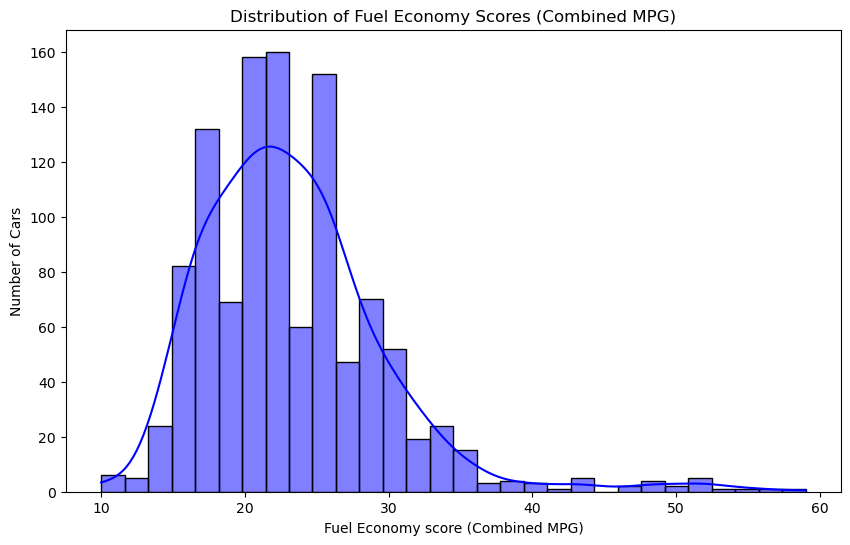

In [14]:
# ANSWER HERE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.histplot(df['comb_mpg'], bins=30, kde=True, color='blue')
plt.xlabel('Fuel Economy score (Combined MPG)')
plt.ylabel('Number of Cars')
plt.title('Distribution of Fuel Economy Scores (Combined MPG)')
plt.show()

## Q8. Average MPG by Engine Displacement Range  

In this task, you will group vehicles into **engine displacement ranges**.  

1. Create a new column `displacement_bin` that categorizes vehicles into the following ranges based on their engine displacement (the category names should be simple Strings):  
   - `0-2L`  
   - `2-4L`  
   - `4-6L`  
   - `6L+`  
2. Group the dataset by this new `displacement_bin` column and calculate the **average combined MPG** for each range.  
3. Create a bar chart showing the average combined MPG per displacement range.  
   - Label the axes appropriately.  
   - Add a descriptive title.

C:\Users\aenap\AppData\Local\Temp\ipykernel_9444\2260708906.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Avg_mpg = df.groupby('displacement_bin')['comb_mpg'].mean().reset_index()


Average Combined MPG by Engine Displacement Range:   displacement_bin   comb_mpg
0             0-2L  33.160377
1             2-4L  24.218157
2             4-6L  17.176471
3              6L+  15.293103


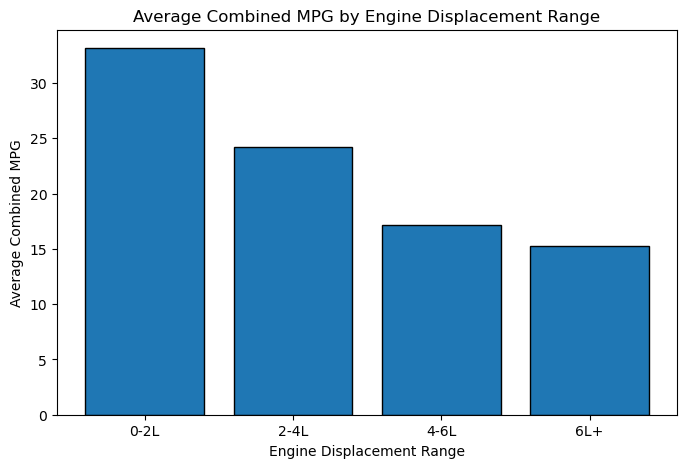

In [15]:
# ANSWER HERE
bins = [0, 2, 4, 6, df['engine_displacement'].max()]
labels = ['0-2L', '2-4L', '4-6L', '6L+']

df['displacement_bin'] = pd.cut(
    df['engine_displacement'],
    bins=bins,
    labels=labels,
    right=False 
)


Avg_mpg = df.groupby('displacement_bin')['comb_mpg'].mean().reset_index()

print('Average Combined MPG by Engine Displacement Range:', Avg_mpg)


plt.figure(figsize=(8,5))
plt.bar(Avg_mpg['displacement_bin'], Avg_mpg['comb_mpg'], edgecolor='black')
plt.xlabel("Engine Displacement Range")
plt.ylabel("Average Combined MPG")
plt.title("Average Combined MPG by Engine Displacement Range")
plt.show()

## Q9. Vehicle Performance Analysis  

Create a scatter plot showing the relationship between **engine displacement** and **combined MPG**.  

- The x-axis represents **engine displacement (Liters)**.  
- The y-axis represents **combined MPG**.
- Color the points by **drive system** (`drive_sys`).  
- Scale point sizes by **number of cylinders** (`no_cylinders`).  
- Add dashed reference lines for the average engine displacement and average combined MPG. Include labels for both lines in the legend.  
- Label the axes and add a descriptive title.  

Also add:
- A legend showing the categories for drive system and cylinders.  
- Gridlines for better readability.

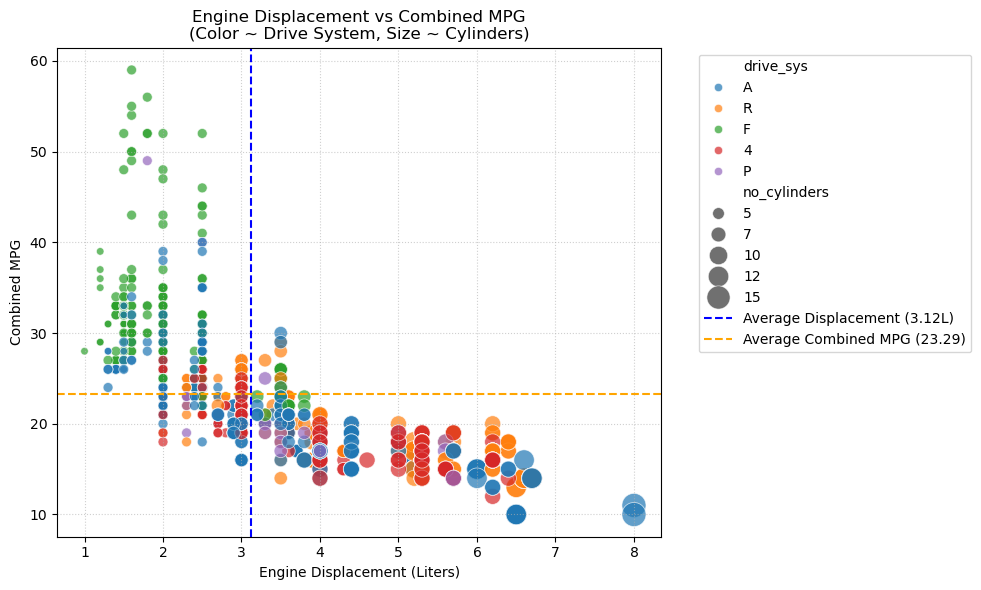

In [19]:
# Q9. Vehicle Performance Analysis
plt.figure(figsize=(10,6))

# Scatter plot: color = drive system, size = cylinders
sns.scatterplot(
    data=df,
    x='engine_displacement',
    y='comb_mpg',
    hue='drive_sys',            # ✅ color by drive system
    size='no_cylinders',        # ✅ size by cylinders
    sizes=(30, 300),
    alpha=0.7
)

# Reference lines (averages)
mean_disp = df['engine_displacement'].mean()
mean_mpg = df['comb_mpg'].mean()

plt.axvline(mean_disp, color='blue', linestyle='--', label=f'Average Displacement ({mean_disp:.2f}L)')
plt.axhline(mean_mpg, color='orange', linestyle='--', label=f'Average Combined MPG ({mean_mpg:.2f})')

# Labels and title
plt.xlabel('Engine Displacement (Liters)')
plt.ylabel('Combined MPG')
plt.title('Engine Displacement vs Combined MPG\n(Color ~ Drive System, Size ~ Cylinders)')

# Grid + legend
plt.grid(True, linestyle=":", alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Q10. Recreate the Heatmap with Pivot Table 

Your task is to reproduce the following figure as closely as possible.  

**Important:** You **must** use a **pivot table** to solve this problem.

Here are a few helpful hints:  
- The plot was created using **Seaborn's `heatmap()`** function.  
- The color map used is **YlGnBu**.  

Start with a basic heatmap, then refine it by adding/adjusting:  
- annotations  
- ticks  
- labels  
- borders  
- title and axis labels  

**Save your final plot as a PDF file named:**  
`city_mpg_heatmap.pdf`

### Reference Figure

![Reference Heatmap](reference_heatmap.png)

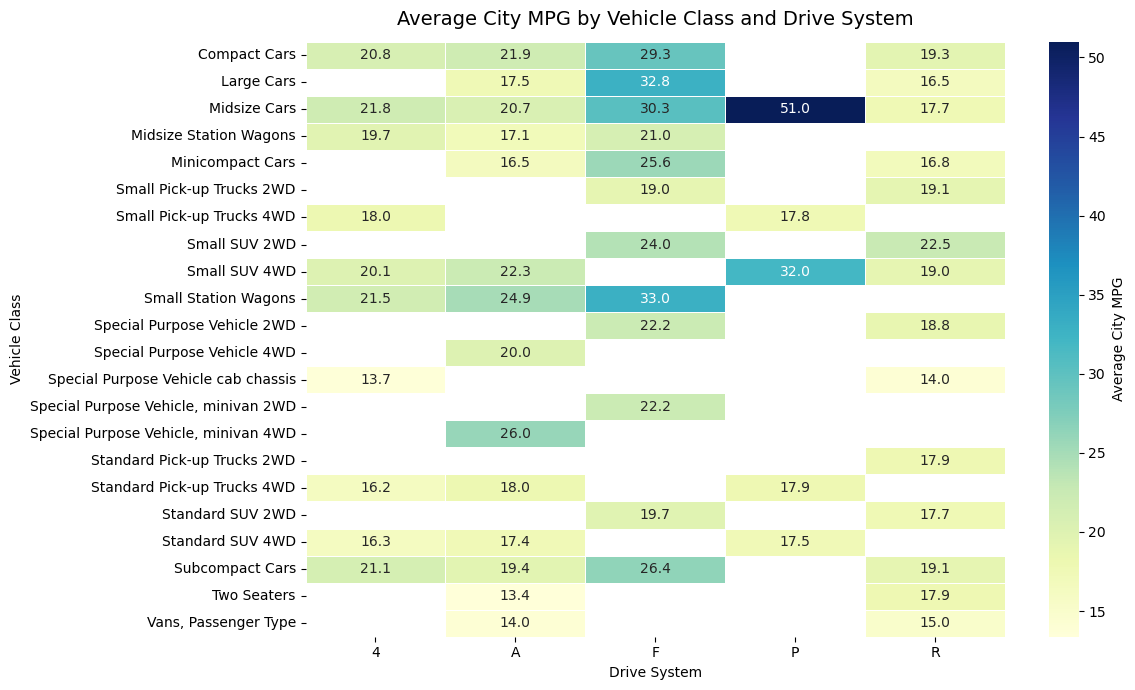

In [20]:
# Q10 — Heatmap: Average City MPG by Vehicle Class × Drive System
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1) Pivot table: average city_mpg by Vehicle Class × Drive System
pivot = df.pivot_table(
    index='class',
    columns='drive_sys',
    values='city_mpg',
    aggfunc='mean'
)

# Reorder drive_sys columns for consistency (if they exist in your data)
order_cols = ['4', 'A', 'F', 'P', 'R']
pivot = pivot[[c for c in order_cols if c in pivot.columns]]

# Sort classes alphabetically for clean axis order
pivot = pivot.sort_index()

# 2) Plot heatmap with annotations
plt.figure(figsize=(12, 7))
ax = sns.heatmap(
    pivot,
    annot=True,           # ✅ add annotations
    fmt=".1f",            # one decimal place
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={'label': 'Average City MPG'}
)

# 3) Titles and labels
ax.set_title("Average City MPG by Vehicle Class and Drive System", fontsize=14, pad=12)
ax.set_xlabel("Drive System")
ax.set_ylabel("Vehicle Class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # keep drive_sys labels horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # keep class labels horizontal

plt.tight_layout()

# 4) Save as PDF
plt.savefig("city_mpg_heatmap.pdf", bbox_inches="tight")
plt.show()
